In [1]:
# loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(8,6)})

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#READ THE DATASET
df = pd.read_csv('C:/Users/User/anaconda399/dataset/online.csv')
print(df.shape)

(455, 23)


In [3]:
df.head()

,Timestamp,email,Age,Gender,Institute Type,Year,Subject,"Device Used (1=Laptop/Desktop, 2=Mobile/Tab)","Connection Type (1=Broadband, 2=Mobile Data, 3=Modem)",Rate Your Internet Connection,...,Hours Spent for online classes,Screen time per day,Rate your online learning experience,"Compare online result with regular result (1=Better, 2=Same, 3=Worse)","Did you have to withdraw any course due to any kind of online related issue? (1=Yes, 2=No)",Specify reason for withdrawal of course (if applicable),How lenient ware the faculties with online class issues (overall),"Are the course material available online and accessible? (1=Yes, 2=No)","Do the teachers provide class recordings (1=Yes, 2=No)","How often do you watch the recordings? (1=Daily, 2=Weekly, 3=Before exams)"
0,2021/08/07 8:24:09 PM GMT+6,sayed.siddik@northsouth.edu,22,Male,Private,4,CSE,1,1,1,...,>=6,10+,3,2,2,NaN,3,1,1,3
1,2021/08/07 8:33:34 PM GMT+6,maaher1145@gmail.com,24,Male,Private,4,Computer Science and Engineering,1,1,4,...,5,9,4,1,2,NaN,3,1,1,2
2,2021/08/07 8:33:49 PM GMT+6,Zahid.juel1998@gmail.com,23,Male,Private,4,CSE,1,1,3,...,5,10+,3,3,1,The faculty’s exam taking method was terrific ...,2,2,1,3
3,2021/08/07 8:38:29 PM GMT+6,rucksana.upoma@northsouth.edy,24,Female,Private,4,CSE,2,1,4,...,>=6,10+,4,3,2,NaN,2,1,1,2
4,2021/08/07 8:51:57 PM GMT+6,jaynab.sultana@northsouth.edu,22,Female,Private,4,CSE,1,2,1,...,5,10+,1,3,2,NaN,1,1,1,2


In [4]:
df.isnull().sum()

Timestamp                                                                                       0
email                                                                                           0
Age                                                                                             0
Gender                                                                                          0
Institute Type                                                                                  0
Year                                                                                            0
Subject                                                                                         0
Device Used (1=Laptop/Desktop, 2=Mobile/Tab)                                                    0
Connection Type (1=Broadband, 2=Mobile Data, 3=Modem)                                           0
Rate Your Internet Connection                                                                   0
Is your electricity 

In [5]:

#data preprocessing
df2 = df.rename(columns={"Device Used (1=Laptop/Desktop, 2=Mobile/Tab)":"D-used","Connection Type (1=Broadband, 2=Mobile Data, 3=Modem)":"connection_ty","Rate Your Internet Connection":"net_rating","Hours Spent for online classes":"hours_sp_p_d","Screen time per day":"s_time_p_d","Rate your online learning experience":"rating_onL_ex", "Compare online result with regular result (1=Better, 2=Same, 3=Worse)":"compare_on_off","Did you have to withdraw any course due to any kind of online related issue? (1=Yes, 2=No)":"iswithdraw","Specify reason for withdrawal of course (if applicable)":"s_reason_w","How lenient ware the faculties with online class issues (overall)":"lenient_fac","Are the course material available online and accessible? (1=Yes, 2=No)":"is_course_mat_a","Do the teachers provide class recordings (1=Yes, 2=No)":"do_techers_P_m","How often do you watch the recordings? (1=Daily, 2=Weekly, 3=Before exams)":"How_often_w_R"})

In [6]:
print(df2)

                       Timestamp                          email Age  Gender  \
0    2021/08/07 8:24:09 PM GMT+6    sayed.siddik@northsouth.edu  22    Male   
1    2021/08/07 8:33:34 PM GMT+6           maaher1145@gmail.com  24    Male   
2    2021/08/07 8:33:49 PM GMT+6       Zahid.juel1998@gmail.com  23    Male   
3    2021/08/07 8:38:29 PM GMT+6  rucksana.upoma@northsouth.edy  24  Female   
4    2021/08/07 8:51:57 PM GMT+6  jaynab.sultana@northsouth.edu  22  Female   
..                           ...                            ...  ..     ...   
450  2021/08/18 3:31:03 PM GMT+6     maria.salma@northsouth.edu  21  Female   
451  2021/08/18 4:48:31 PM GMT+6    asikur.rahman0129@gmail.com  20    Male   
452  2021/08/18 6:08:59 PM GMT+6   nusaiba.shafi@northsouth.edu  20  Female   
453  2021/08/20 8:52:57 AM GMT+6                           erw   24    Male   
454  2021/08/20 8:57:53 AM GMT+6            R.alam777@gmail.com  23    Male   

    Institute Type  Year                           

In [7]:
df2.head()

,Timestamp,email,Age,Gender,Institute Type,Year,Subject,D-used,connection_ty,net_rating,...,hours_sp_p_d,s_time_p_d,rating_onL_ex,compare_on_off,iswithdraw,s_reason_w,lenient_fac,is_course_mat_a,do_techers_P_m,How_often_w_R
0,2021/08/07 8:24:09 PM GMT+6,sayed.siddik@northsouth.edu,22,Male,Private,4,CSE,1,1,1,...,>=6,10+,3,2,2,NaN,3,1,1,3
1,2021/08/07 8:33:34 PM GMT+6,maaher1145@gmail.com,24,Male,Private,4,Computer Science and Engineering,1,1,4,...,5,9,4,1,2,NaN,3,1,1,2
2,2021/08/07 8:33:49 PM GMT+6,Zahid.juel1998@gmail.com,23,Male,Private,4,CSE,1,1,3,...,5,10+,3,3,1,The faculty’s exam taking method was terrific ...,2,2,1,3
3,2021/08/07 8:38:29 PM GMT+6,rucksana.upoma@northsouth.edy,24,Female,Private,4,CSE,2,1,4,...,>=6,10+,4,3,2,NaN,2,1,1,2
4,2021/08/07 8:51:57 PM GMT+6,jaynab.sultana@northsouth.edu,22,Female,Private,4,CSE,1,2,1,...,5,10+,1,3,2,NaN,1,1,1,2


In [8]:
df2.columns

Index(['Timestamp', 'email', 'Age', 'Gender', 'Institute Type', 'Year',
       'Subject', 'D-used', 'connection_ty', 'net_rating',
       'Is your electricity service uninterrupted? (1=Yes, 2=No)',
       'Cost of internet bill per month', 'Family Income Per Month',
       'hours_sp_p_d', 's_time_p_d', 'rating_onL_ex', 'compare_on_off',
       'iswithdraw', 's_reason_w', 'lenient_fac', 'is_course_mat_a',
       'do_techers_P_m', 'How_often_w_R'],
      dtype='object')

In [9]:
#rename and agrregate the subject columns
df2['Subject'].replace({'CSE':'cse', 'Computer Science and Engineering':'cse', 'CSE ':'cse', 'BBA':'bba',
       'Computer Science And Engineering ':'cse', 'ETE':'ete', 'Marketing ':'mrk', 'EEE':'eee',
       'Microbiology ':'mib', 'BBA in Economics and International Business':'bba',
       'BBA finance':'bba', 'Computer Science':'cse', 'Marketing':'mrk', 'Cse':'cse', 'cse':'cse',
       'Architecture':'arc', 'B.A in English':'eng', 'biochemistry ':'mib',
       'BBA in Finance':'bba', 'Bba':'bba', 'Accounting ':'acc',
       'B.Sc in Computer Science and Engineering':'cse', 'Economics':'eco', 'MBA':'mba',
       'Bba in finance ':'bba', 'Civil&Environmental Engineering ':'civil', 'Law':'law',
       'CIVIL & ENVIRONMENTAL ENGINEERING ':'civil', 'LLB':'law', "B.Pharm(Hon's)":'prm',
       'Computer Science & Engineering':'cse', 'English':'eng', 'ece':'cse',
       'Environmental Science':'env', 'B.Sc in Textile Engineering ':'txtl',
       'computer science and egineering ':'cse', 'Computer Science Engineering':'cse',
       'Applied Mathematics':'apm', 'Pharmacy ':'prm', 'Bachelor of pharmacy':'prm',
       'Agricultural Engineering ':'arc', 'Doctor of veterinary medicine ':'dvete',
       'BBA in International Business':'bba', 'BBA ':'bba',
       'Computer Science and Engineering ':'cse', 'Cse445':'cse', '?':'cse',
       'Nutrition and Food Engineering':'nfe',
       'Chemical engineering and polymer science':'cep',
       'Industrial and Production Engineering':'ipe',
       'Applied Chemistry & Chemical Engineering':'acce',
       'International Relations  ':'ir',
       'Organization Strategy and Leadership':'osl', 'Mathematics':'m', 'Finance ':'bba',
       'SWE':'swe', 'Medicine':'m', 'Dental':'d', 'Manegment':'m', 'Business ':'bba',
       'Textile Engineering ':'txtl', 'Eee':'eee', 'AIS':'ais', 'Environmental science':'env',
       'english':'eng', 'Computer Science Engineering ':'cse', 'Bs in economics':'eco',
       'Biochemistry and biotechnology ':'bc_a_bt', 'Computer Science ':'cse', 'ESM':'esm',
       'LAW':'law', 'Biochemistry & Biotechnology':'bc_a_bt', 'Accounting':'bba',
       'Biochemistry ':'bc_a_bt', 'Biotechnology ':'bc_a_bt', 'ECE(CSE)':'cse',
       'English literature ':'eng', 'EEE Major, ECE':'cse', 'Bachelor of pharmacy ':'prm',
       'Mba':'mba', 'B.Pharm':'prm', 'CEE':'civil', 'Pharmaceutical Sciences':'prm', 'English ':'eng',
       'B.BA in Finance':'bba', 'MKT':'mkt', 'Pharmacy':'prm',
       'Computer Science & Engineering ':'cse', 'Finance and economics':'eco',
       'Biochemistry':'bc_a_bt', 'Public health ':'pbh', 'BBA GENERAL':'bba', 'BBA in Finance ':'bba',
       'Pharmaceutical Science':'prm', 'Supply chain management ':'scm',
       'Bachelors in Business Administration':'bba', 'Pharmaceutical sciences':'prm',
       'English linguistic.':'eng', '🙈':'bba', 'Bachelor in Pharmacy':'prm',
       'computer science and Engineering ':'cse', 'B.Pharm Professional ':'prm',
       'Pharmaceutical science ':'prm', 'Human Resource And Management ':'hr', 'eco':'eco',
       'Pharmaceutical Sciences ':'prm', 'Biochem and biotech':'bc_a_bt',
       'Professional pharmacy':'prm', 'Bachelor of bpharm professional':'prm',
       'Bachelors of Pharmacy':'prm', 'Major in CSE':'cse',
       'Department of pharmaceutical sciences':'prm',
       'Biochemistry and Biotechnology':'bc_a_bt',
       'Electrical and Electronic Engineering    ':'eee', 'BPharm':'prm',
       'BBA in Finance and HRM':'bba', 'bba':'bba', 'Pharmaceuticals science ':'prm',
       'International Business and Economics':'eco',
       'Biochemistry and biotechnology':'bc_a_bt', 'Finance':'bba', ' EEE':'eee', 'HRM':'hrm', 'LLB ':'llb',
       'Environmental Science and Management ':'env', 'B.pham ':'prm', 'BBA general':'bba',
       'Pharmacy Professional ':'prm',
       'Electronics and Telecommunication Engineering':'eee',
       'Civil and environment':'civil', 'BBA Marketing ':'bba', 'BBA in Economics':'bba',
       'Pharmacology ':'prm', 'Biochemistry and Biotechnology ':'bc_a_bt', 'Llb ':'llb',
       'Supply Chain Management ':'scm', 'Applied Mathematics ':'apm',
       'Pharmacy professionals ':'prm', 'BBA Department':'bba', 'Economic ':'eco', 'EEW':'eew',
       'Computer science and engineering ':'cse', 'CSe':'cse', 'ECONOMICS':'eco', 'L.L.B':'llb',
       'Microbiology':'mib', 'Biochemistry & Biotechnology ':'bc_a_bt', 'Management ':'emv',
       'Environmental science ':'env', 'BBA in FIN':'bba',
       'Environmental science and management':'env', 'SCM and FIN':'scm',
       'BBA in Marketing':'bba', 'ECE':'cse'},inplace=True)

In [10]:
#Investigate all the elements within each feature
for cols in df2.columns:
    unique_vals = df2[cols].unique()
    if len(unique_vals)<=10:
        print("Feature ", cols, "has", len(unique_vals),"unique values --->", unique_vals)
        
    else:
        print("Feature ", cols, "has ", len(unique_vals),"unique values")

Feature  Timestamp has  455 unique values
Feature  email has  441 unique values
Feature  Age has 8 unique values ---> ['22' '24' '23' '20' '21' '19' '>=25' '18']
Feature  Gender has 2 unique values ---> ['Male' 'Female']
Feature  Institute Type has 3 unique values ---> ['Private' 'Public' 'National']
Feature  Year has 4 unique values ---> [4 1 3 2]
Feature  Subject has  38 unique values
Feature  D-used has 2 unique values ---> [1 2]
Feature  connection_ty has 3 unique values ---> [1 2 3]
Feature  net_rating has 5 unique values ---> [1 4 3 2 5]
Feature  Is your electricity service uninterrupted? (1=Yes, 2=No) has 2 unique values ---> [2 1]
Feature  Cost of internet bill per month has 4 unique values ---> ['1000' '1500' '2000+' '2000']
Feature  Family Income Per Month has 6 unique values ---> ['40000-49999' '70000+' '20000-29999' '30000-39999' '50000-59999'
 '60000-69999']
Feature  hours_sp_p_d has 4 unique values ---> ['>=6' '5' '4' '3']
Feature  s_time_p_d has 5 unique values ---> ['10

In [11]:
df2 = pd.DataFrame(df2)

In [12]:
df2.drop(columns =['Timestamp','email'], inplace =True )

In [13]:
#converting categorical values to numeric represention
#df2['hours_sp_p_d'].value_counts()

In [14]:
df2['How_often_w_R'].replace({1:'Daily',2:'Weekly',3:'Before exams'}, inplace = True)

In [15]:
df2['How_often_w_R'].value_counts()

Before exams    282
Weekly          128
Daily            45
Name: How_often_w_R, dtype: int64

In [16]:
df2['hours_sp_p_d'].value_counts()

3      135
>=6    129
4       99
5       92
Name: hours_sp_p_d, dtype: int64

In [17]:
df2['Is your electricity service uninterrupted? (1=Yes, 2=No)'].value_counts()

2    258
1    197
Name: Is your electricity service uninterrupted? (1=Yes, 2=No), dtype: int64

In [18]:
df2['Is your electricity service uninterrupted? (1=Yes, 2=No)'].replace({1:'yes',2:'no'}, inplace = True)

In [19]:
df2['Is your electricity service uninterrupted? (1=Yes, 2=No)'].value_counts()

no     258
yes    197
Name: Is your electricity service uninterrupted? (1=Yes, 2=No), dtype: int64

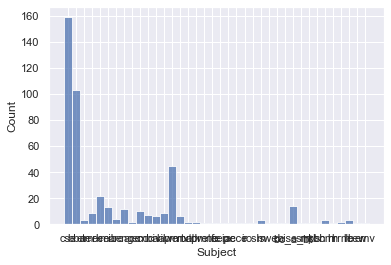

In [20]:
sns.histplot(x = 'Subject', data = df2);

In [21]:
#list the import features
mylist=['Age', 'Gender', 'Institute Type', 'Year',
       'Subject', 'D-used', 'connection_ty', 'net_rating',
       'Is your electricity service uninterrupted? (1=Yes, 2=No)',
       'Cost of internet bill per month', 'Family Income Per Month',
       'hours_sp_p_d', 's_time_p_d', 'rating_onL_ex', 'compare_on_off',
       'iswithdraw', 's_reason_w', 'lenient_fac', 'is_course_mat_a',
       'do_techers_P_m', 'How_often_w_R']

In [82]:
cat_featurelist1=['Gender','Institute Type', 
       'Subject',
       'Is your electricity service uninterrupted? (1=Yes, 2=No)',
        
       'hours_sp_p_d', 's_time_p_d', 
        's_reason_w', 
        'How_often_w_R']

In [83]:
print(cat_featurelist1)

['Gender', 'Institute Type', 'Subject', 'Is your electricity service uninterrupted? (1=Yes, 2=No)', 'hours_sp_p_d', 's_time_p_d', 's_reason_w', 'How_often_w_R']


In [84]:
df3= df2[mylist]
df3.head()
df3['Cost of internet bill per month'].value_counts()


1000     303
1500      98
2000      27
2000+     26
Name: Cost of internet bill per month, dtype: int64

In [85]:
print(df3.shape)

(454, 21)


In [71]:
df3.head()

,Age,Gender,Institute Type,Year,Subject,D-used,connection_ty,net_rating,"Is your electricity service uninterrupted? (1=Yes, 2=No)",Cost of internet bill per month,...,hours_sp_p_d,s_time_p_d,rating_onL_ex,compare_on_off,iswithdraw,s_reason_w,lenient_fac,is_course_mat_a,do_techers_P_m,How_often_w_R
0,22,Male,Private,4,cse,1,1,1,no,1000,...,>=6,10+,3,2,2,NaN,3,1,1,Before exams
1,24,Male,Private,4,cse,1,1,4,no,1500,...,5,9,4,1,2,NaN,3,1,1,Weekly
2,23,Male,Private,4,cse,1,1,3,yes,1000,...,5,10+,3,3,1,The faculty’s exam taking method was terrific ...,2,2,1,Before exams
3,24,Female,Private,4,cse,2,1,4,yes,1000,...,>=6,10+,4,3,2,NaN,2,1,1,Weekly
4,22,Female,Private,4,cse,1,2,1,no,2000+,...,5,10+,1,3,2,NaN,1,1,1,Weekly


In [86]:
df3 = pd.get_dummies(data = df3, columns = cat_featurelist1)
df3.head()

,Age,Year,D-used,connection_ty,net_rating,Cost of internet bill per month,Family Income Per Month,rating_onL_ex,compare_on_off,iswithdraw,...,"s_reason_w_i can't concentrate like i used to offline, so ended up getting bad marks",s_reason_w_i couldn't understand,s_reason_w_i didn’t withdraw any course,s_reason_w_miss some classes and bad mid exam for net and electricity interruption.,s_reason_w_no need,s_reason_w_👀,s_reason_w_🧏‍♀️,How_often_w_R_Before exams,How_often_w_R_Daily,How_often_w_R_Weekly
0,22,4,1,1,1,1000,40000-49999,3,2,2,...,0,0,0,0,0,0,0,1,0,0
1,24,4,1,1,4,1500,70000+,4,1,2,...,0,0,0,0,0,0,0,0,0,1
2,23,4,1,1,3,1000,70000+,3,3,1,...,0,0,0,0,0,0,0,1,0,0
3,24,4,2,1,4,1000,70000+,4,3,2,...,0,0,0,0,0,0,0,0,0,1
4,22,4,1,2,1,2000+,20000-29999,1,3,2,...,0,0,0,0,0,0,0,0,0,1


In [88]:
df3.columns

Index(['Age', 'Year', 'D-used', 'connection_ty', 'net_rating',
       'Cost of internet bill per month', 'Family Income Per Month',
       'rating_onL_ex', 'compare_on_off', 'iswithdraw',
       ...
       's_reason_w_i can't concentrate like i used to offline, so ended up getting bad marks',
       's_reason_w_i couldn't understand',
       's_reason_w_i didn’t withdraw any course',
       's_reason_w_miss some classes and bad mid exam for net and electricity interruption.',
       's_reason_w_no need', 's_reason_w_👀', 's_reason_w_🧏‍♀️',
       'How_often_w_R_Before exams', 'How_often_w_R_Daily',
       'How_often_w_R_Weekly'],
      dtype='object', length=148)

In [94]:
#Features scalling

df3['Gender_Male']
df3['Gender_Male']

0      1
1      1
2      1
3      0
4      0
      ..
450    0
451    1
452    0
453    1
454    1
Name: Gender_Male, Length: 454, dtype: uint8

In [91]:
df3['Age'].value_counts()

21      104
23       93
22       79
20       69
24       44
>=25     40
19       17
18        8
Name: Age, dtype: int64

In [92]:
df3['Cost of internet bill per month'].value_counts()

1000     303
1500      98
2000      27
2000+     26
Name: Cost of internet bill per month, dtype: int64

In [93]:
df3['Family Income Per Month'].value_counts()

70000+         164
20000-29999     76
50000-59999     62
40000-49999     62
30000-39999     55
60000-69999     35
Name: Family Income Per Month, dtype: int64

In [89]:
df3.describe()

,Year,D-used,connection_ty,net_rating,rating_onL_ex,compare_on_off,iswithdraw,lenient_fac,is_course_mat_a,do_techers_P_m,...,"s_reason_w_i can't concentrate like i used to offline, so ended up getting bad marks",s_reason_w_i couldn't understand,s_reason_w_i didn’t withdraw any course,s_reason_w_miss some classes and bad mid exam for net and electricity interruption.,s_reason_w_no need,s_reason_w_👀,s_reason_w_🧏‍♀️,How_often_w_R_Before exams,How_often_w_R_Daily,How_often_w_R_Weekly
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,2.775330,1.398678,1.167401,3.182819,2.823789,2.123348,1.755507,2.900881,1.154185,1.270925,...,0.002203,0.002203,0.002203,0.002203,0.002203,0.002203,0.002203,0.621145,0.099119,0.279736
std,1.122796,0.490166,0.443938,0.908418,1.031409,0.798858,0.430261,0.947332,0.361524,0.444928,...,0.046932,0.046932,0.046932,0.046932,0.046932,0.046932,0.046932,0.485637,0.299151,0.449364
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,4.000000,3.000000,3.000000,2.000000,3.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,2.000000,3.000000,5.000000,5.000000,3.000000,2.000000,5.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
#separting input and output

X=df3.drop(columns='compare_on_off')
y = df3['compare_on_off']


In [119]:
#features scalling
X.describe()

,Age,Year,D-used,connection_ty,net_rating,Cost of internet bill per month,Family Income Per Month,rating_onL_ex,iswithdraw,lenient_fac,...,"s_reason_w_i can't concentrate like i used to offline, so ended up getting bad marks",s_reason_w_i couldn't understand,s_reason_w_i didn’t withdraw any course,s_reason_w_miss some classes and bad mid exam for net and electricity interruption.,s_reason_w_no need,s_reason_w_👀,s_reason_w_🧏‍♀️,How_often_w_R_Before exams,How_often_w_R_Daily,How_often_w_R_Weekly
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,21.947137,2.775330,1.398678,1.167401,3.182819,1253.303965,54185.022026,2.823789,1.755507,2.900881,...,0.002203,0.002203,0.002203,0.002203,0.002203,0.002203,0.002203,0.621145,0.099119,0.279736
std,1.686678,1.122796,0.490166,0.443938,0.908418,422.517536,19108.061366,1.031409,0.430261,0.947332,...,0.046932,0.046932,0.046932,0.046932,0.046932,0.046932,0.046932,0.485637,0.299151,0.449364
min,18.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,25000.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,1.000000,1.000000,3.000000,1000.000000,35000.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,3.000000,1.000000,1.000000,3.000000,1000.000000,55000.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,23.000000,4.000000,2.000000,1.000000,4.000000,1500.000000,75000.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,25.000000,4.000000,2.000000,3.000000,5.000000,2500.000000,75000.000000,5.000000,2.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
df3['Age'].replace({'21':21,
'23':23,
'22':22, 
'20':20,      
'24':24,'>=25':25,'19':19,
'18':18}, inplace = True)
df3['Cost of internet bill per month'].replace({'1000':1000,
'1500':1500 ,'2000':2000, '2000+':2500 }, inplace = True)
df3['Family Income Per Month'].replace({'70000+':75000, '20000-29999':25000,'50000-59999':55000,'40000-49999':45000,
'30000-39999':35000,
 '60000-69999':65000 }, inplace = True)

In [121]:
df3['Age'].value_counts()


21    104
23     93
22     79
20     69
24     44
25     40
19     17
18      8
Name: Age, dtype: int64

In [122]:
df3['Cost of internet bill per month'].value_counts()

1000    303
1500     98
2000     27
2500     26
Name: Cost of internet bill per month, dtype: int64

In [123]:
df3['Family Income Per Month'].value_counts()

75000    164
25000     76
55000     62
45000     62
35000     55
65000     35
Name: Family Income Per Month, dtype: int64

In [124]:
X=df3.drop(columns='compare_on_off')
y = df3['compare_on_off']

In [129]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 20)
print(X_train.shape)
print(X_test.shape)

(408, 147)
(46, 147)


In [130]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [131]:
X_test.head()

,Age,Year,D-used,connection_ty,net_rating,Cost of internet bill per month,Family Income Per Month,rating_onL_ex,iswithdraw,lenient_fac,...,"s_reason_w_i can't concentrate like i used to offline, so ended up getting bad marks",s_reason_w_i couldn't understand,s_reason_w_i didn’t withdraw any course,s_reason_w_miss some classes and bad mid exam for net and electricity interruption.,s_reason_w_no need,s_reason_w_👀,s_reason_w_🧏‍♀️,How_often_w_R_Before exams,How_often_w_R_Daily,How_often_w_R_Weekly
13,0.142857,0.000000,0.0,0.0,0.75,0.000000,0.6,0.50,1.0,0.50,...,0,0,0,0,0,0,0,1,0,0
320,0.714286,1.000000,1.0,0.0,0.50,0.333333,0.2,0.50,1.0,0.50,...,0,0,0,0,0,0,0,1,0,0
140,0.571429,0.666667,1.0,0.0,0.25,0.000000,1.0,0.25,0.0,0.25,...,0,0,0,0,0,0,0,1,0,0
176,0.285714,0.333333,0.0,0.0,0.75,0.000000,1.0,0.50,1.0,0.50,...,0,0,0,0,0,0,0,0,1,0
408,0.714286,1.000000,0.0,0.0,0.50,0.000000,0.4,0.00,1.0,0.00,...,0,0,0,0,0,0,0,1,0,0


In [132]:
#features selection
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

['Subject_ais',
 'Subject_ipe',
 'Subject_nfe',
 'Subject_pbh',
 's_reason_w_Because I was unable to get a good marks in the mid paper ',
 's_reason_w_H',
 "s_reason_w_I didn't drop any course",
 's_reason_w_I didn’t understand her class',
 "s_reason_w_I got disconnected from class during a mid exam due to poor internet connection. The faculty gave me 0 out of 30 because I wasn't in the class with my camera on. I was not awareof the fact that I got disconnected from class as I was focused on my mid. So I had to drop the course.",
 "s_reason_w_Net wasn't good and sir didn't support if I had submitted any copy late",
 's_reason_w_Not applicable',
 "s_reason_w_Teachers don't want to consider internet issue or electricity issue. The online classes are sort of boring and the learning outcome can't meet it's goal.",
 's_reason_w_miss some classes and bad mid exam for net and electricity interruption.',
 's_reason_w_no need']

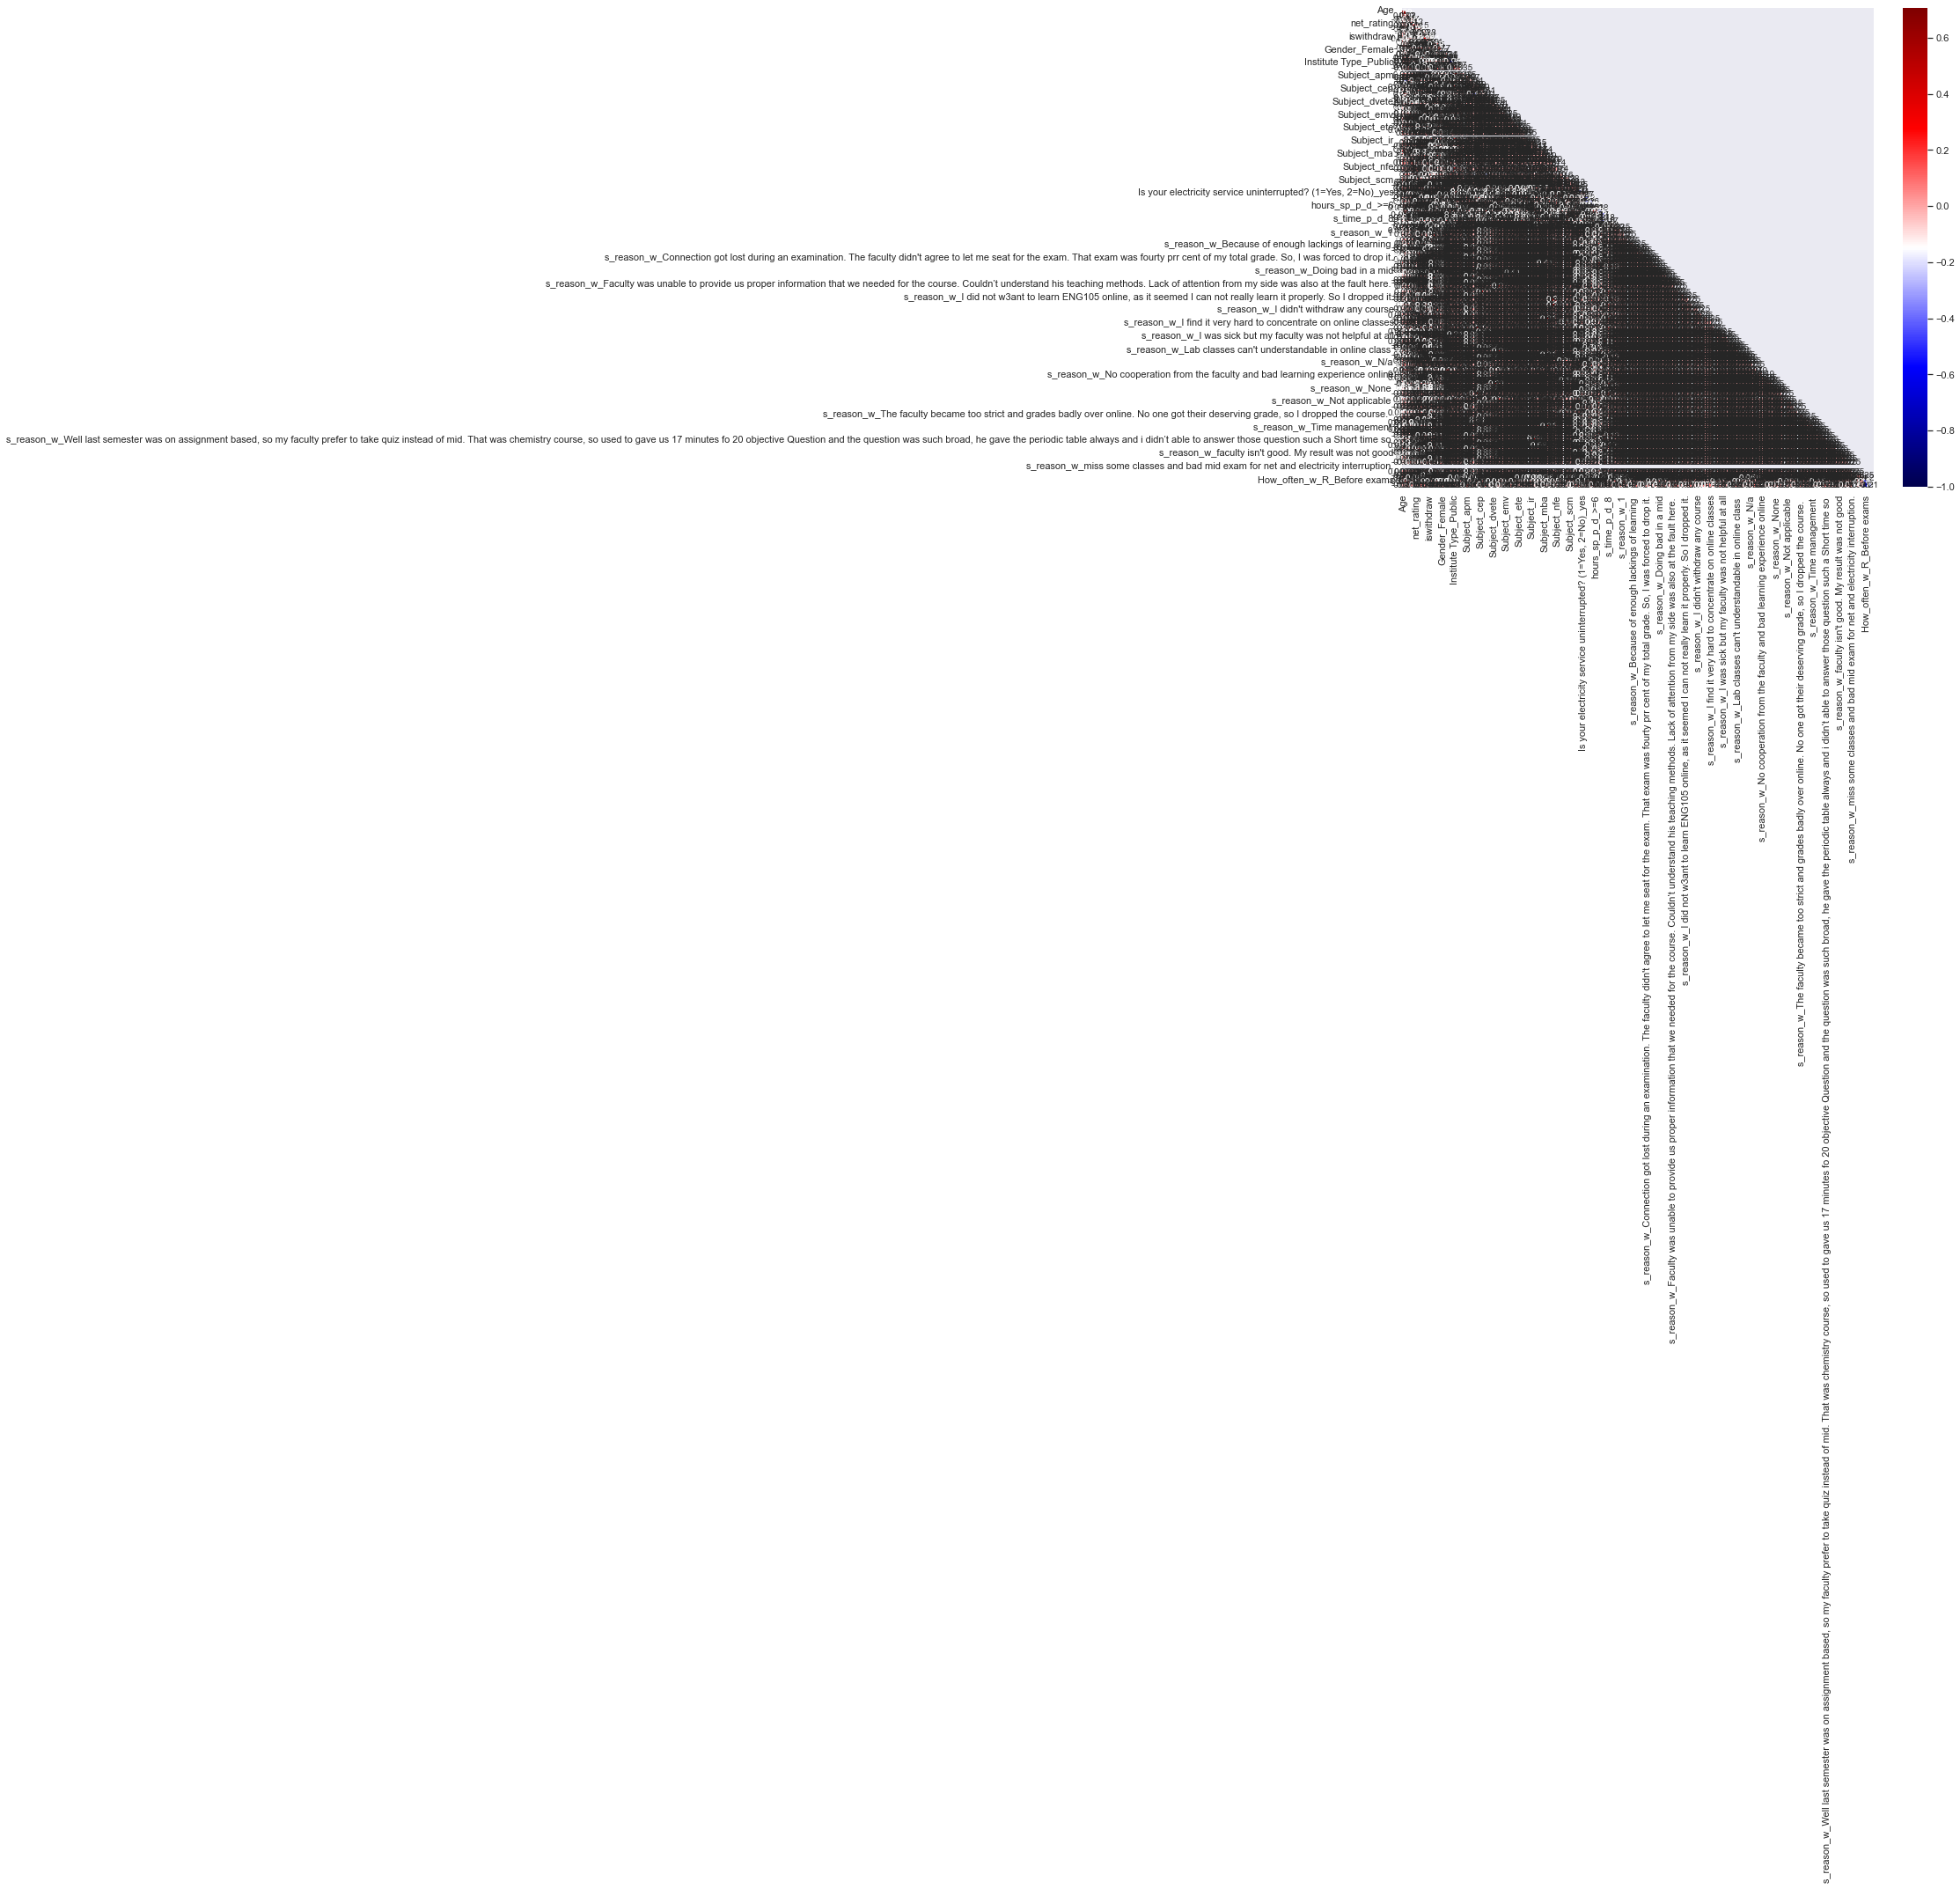

In [133]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [134]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [136]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

3
{'Institute Type_Public', 'Gender_Male', 'Is your electricity service uninterrupted? (1=Yes, 2=No)_yes'}


In [137]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(408, 144)
(46, 144)


# Model creation and evalution




In [138]:
#zeroR classifier
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))


Train Accuracy:  0.38235294117647056
Test Accuracy:  0.43478260869565216


Depth =  2 , Training Accuracy =  0.47549019607843135 , Test Accuracy =  0.5217391304347826 , Diff =  4.624893435635125  %
Depth =  3 , Training Accuracy =  0.48284313725490197 , Test Accuracy =  0.5 , Diff =  1.7156862745098034  %
Depth =  4 , Training Accuracy =  0.5392156862745098 , Test Accuracy =  0.5 , Diff =  3.9215686274509776  %
Depth =  5 , Training Accuracy =  0.6004901960784313 , Test Accuracy =  0.5434782608695652 , Diff =  5.701193520886616  %
Depth =  6 , Training Accuracy =  0.6446078431372549 , Test Accuracy =  0.45652173913043476 , Diff =  18.808610400682017  %
Depth =  7 , Training Accuracy =  0.7132352941176471 , Test Accuracy =  0.4782608695652174 , Diff =  23.497442455242968  %
Depth =  8 , Training Accuracy =  0.7720588235294118 , Test Accuracy =  0.41304347826086957 , Diff =  35.90153452685422  %
Depth =  9 , Training Accuracy =  0.8112745098039216 , Test Accuracy =  0.4782608695652174 , Diff =  33.30136402387042  %
Depth =  10 , Training Accuracy =  0.828431372

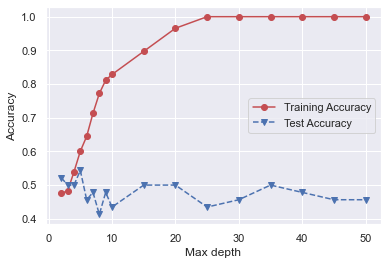

In [139]:
#Decision Tree
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.41304347826086957 , Difference =  58.69565217391304 %
K =  5 , Training Accuracy =  0.553921568627451  Test Accuracy =  0.30434782608695654 , Difference =  24.957374254049448 %
K =  10 , Training Accuracy =  0.49754901960784315  Test Accuracy =  0.391304347826087 , Difference =  10.624467178175617 %
K =  15 , Training Accuracy =  0.44362745098039214  Test Accuracy =  0.3695652173913043 , Difference =  7.406223358908781 %
K =  20 , Training Accuracy =  0.4583333333333333  Test Accuracy =  0.32608695652173914 , Difference =  13.224637681159418 %
K =  25 , Training Accuracy =  0.4632352941176471  Test Accuracy =  0.34782608695652173 , Difference =  11.540920716112534 %
K =  30 , Training Accuracy =  0.4632352941176471  Test Accuracy =  0.32608695652173914 , Difference =  13.714833759590794 %


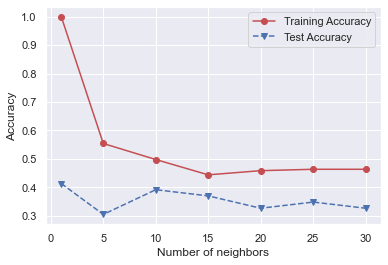

In [140]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.3695652173913043 , Difference =  63.04347826086957 %
K =  5 , Training Accuracy =  0.5563725490196079  Test Accuracy =  0.32608695652173914 , Difference =  23.028559249786873 %
K =  10 , Training Accuracy =  0.5122549019607843  Test Accuracy =  0.391304347826087 , Difference =  12.09505541346973 %
K =  15 , Training Accuracy =  0.47794117647058826  Test Accuracy =  0.32608695652173914 , Difference =  15.185421994884912 %
K =  20 , Training Accuracy =  0.4485294117647059  Test Accuracy =  0.3695652173913043 , Difference =  7.896419437340158 %
K =  25 , Training Accuracy =  0.48284313725490197  Test Accuracy =  0.3695652173913043 , Difference =  11.327791986359765 %
K =  30 , Training Accuracy =  0.44607843137254904  Test Accuracy =  0.32608695652173914 , Difference =  11.999147485080991 %


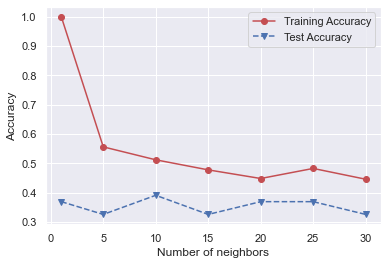

In [141]:

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [142]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.6666666666666666
Test Accuracy:  0.391304347826087

Logistic Regression with L2 regularization
Train Accuracy:  0.6348039215686274
Test Accuracy:  0.41304347826086957


In [143]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.49754901960784315
Test Accuracy:  0.43478260869565216


In [144]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.5612745098039216
Test Accuracy:  0.30434782608695654


In [145]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))


Train Accuracy:  0.38235294117647056
Test Accuracy:  0.43478260869565216


In [146]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[ 0  0 11]
 [ 0  0 15]
 [ 0  0 20]]

Classification Report
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        11
           2      0.000     0.000     0.000        15
           3      0.435     1.000     0.606        20

    accuracy                          0.435        46
   macro avg      0.145     0.333     0.202        46
weighted avg      0.189     0.435     0.264        46



In [149]:
##rom sklearn.metrics import plot_roc_curve
#lf = SVC(gamma = 'auto', random_state = 0)
#ccuracy_test = accuracy_score(X_test, y_test)
#lf.fit(X_train, y_train)
#etrics.plot_roc_curve(clf,accuracy_test);

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

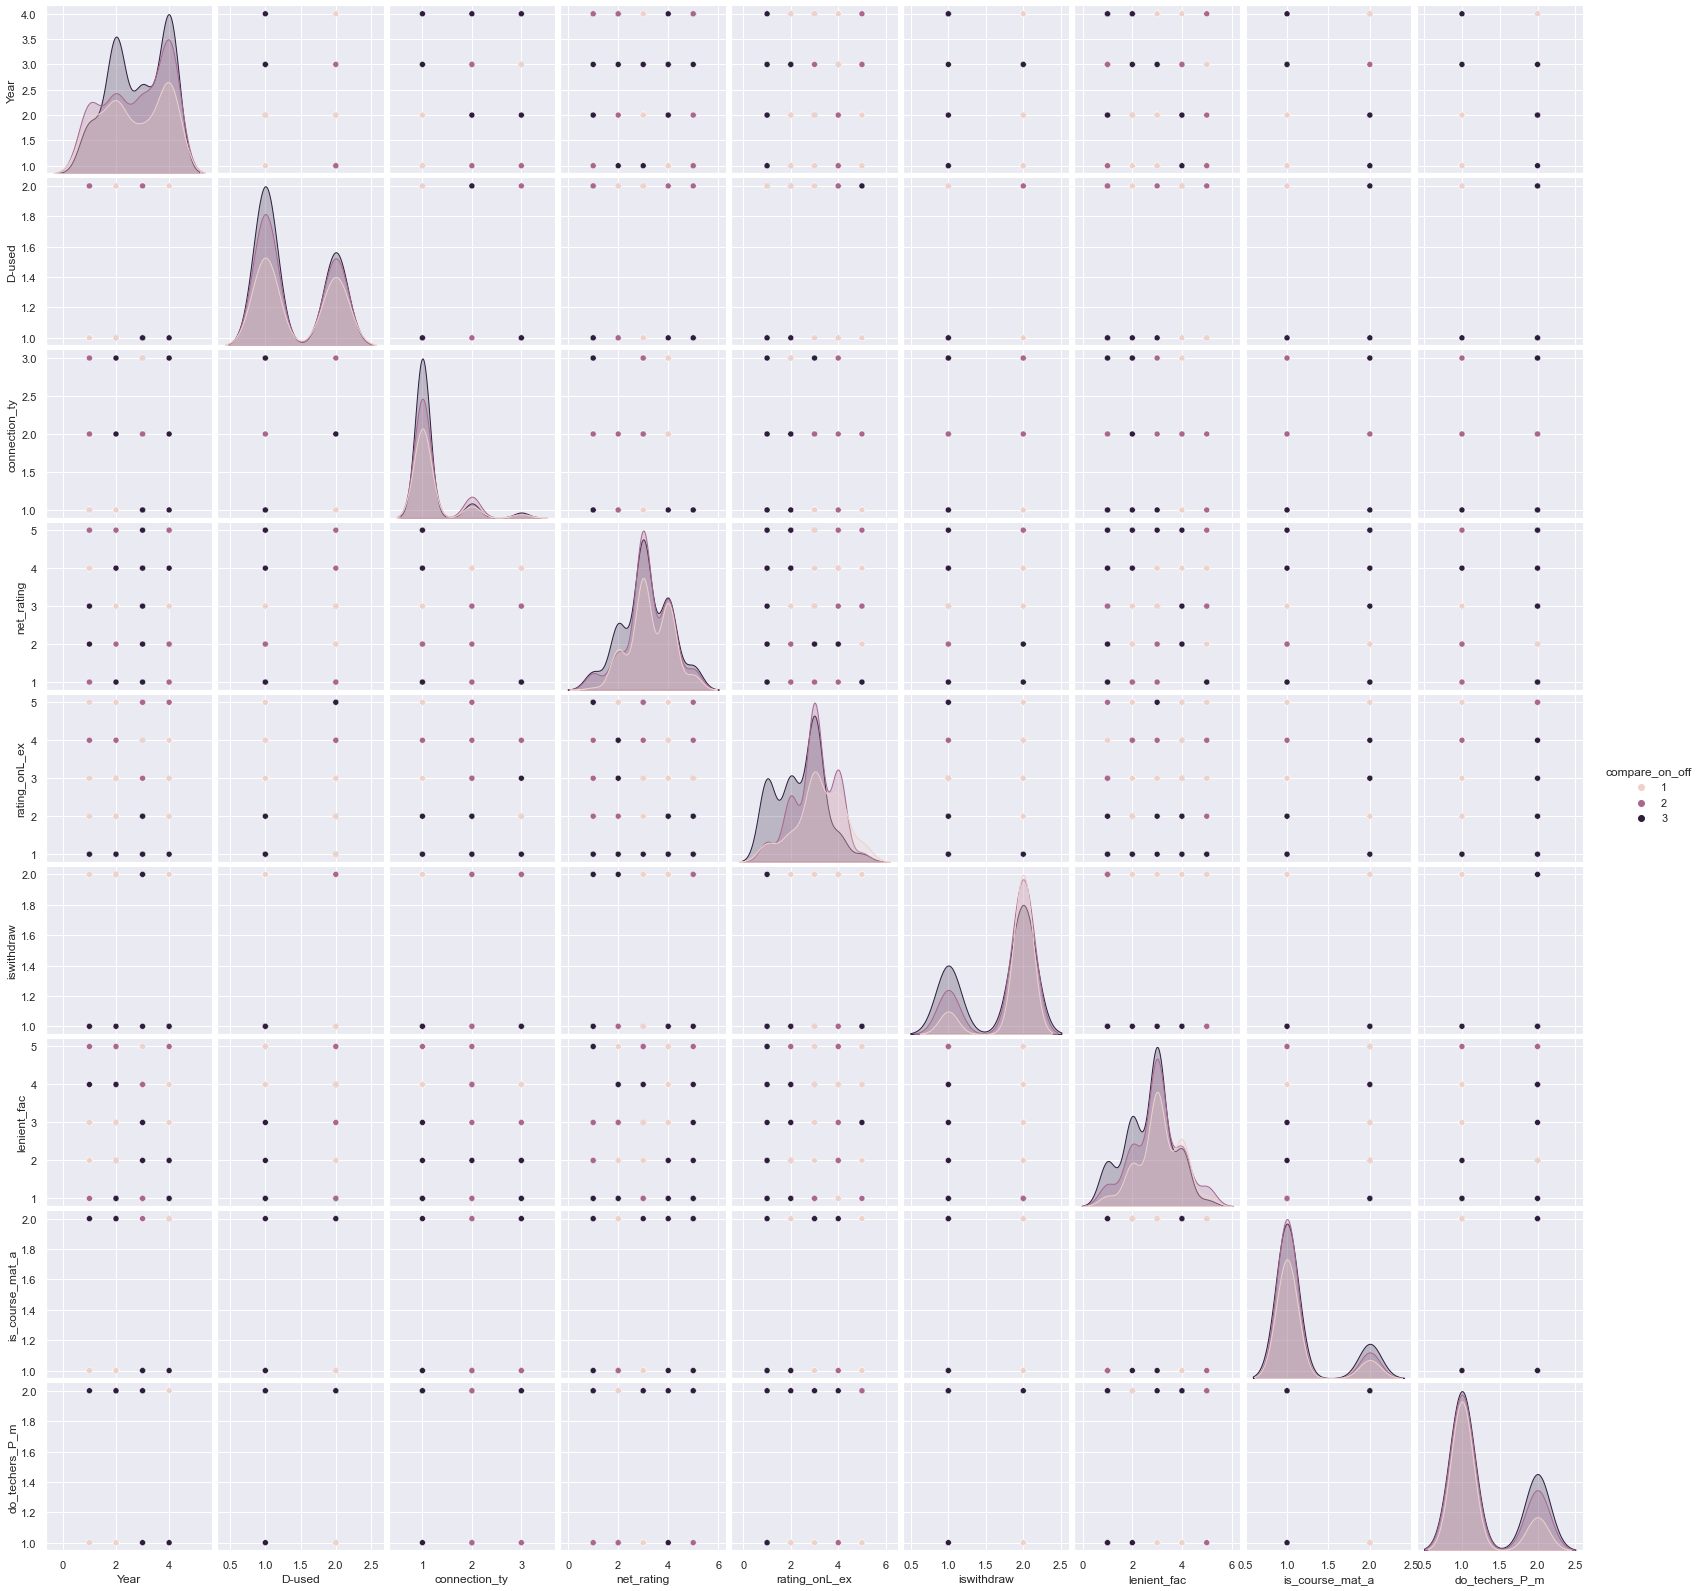

In [28]:
#visualize the dataset with sns pairplot
#visualize the dataset with sns pairplot
#caution: takes a lot of data - so we limit the data
#plt.figure(figsize = (100,25))
g = sns.pairplot(df2, hue = 'compare_on_off')

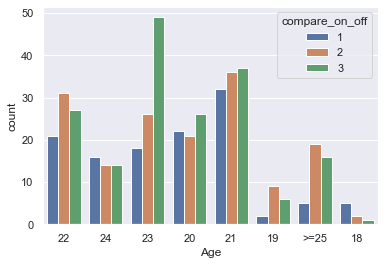

In [29]:
sns.countplot(x = 'Age', data = df2, hue ='compare_on_off' );

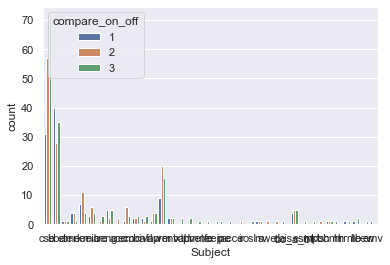

In [30]:
sns.countplot(x = 'Subject', data = df2, hue ='compare_on_off' );

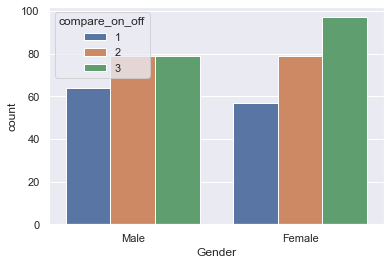

In [31]:
sns.countplot(x = 'Gender', data = df2, hue ='compare_on_off' );

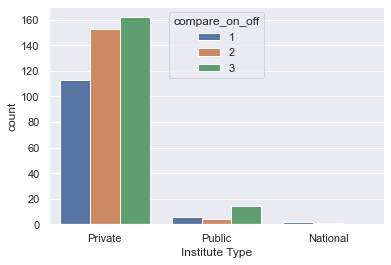

In [32]:
sns.countplot(x = 'Institute Type', data = df2, hue ='compare_on_off' );

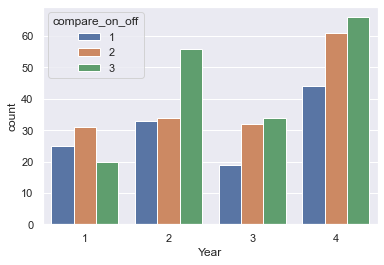

In [33]:
sns.countplot(x = 'Year', data = df2, hue ='compare_on_off' );

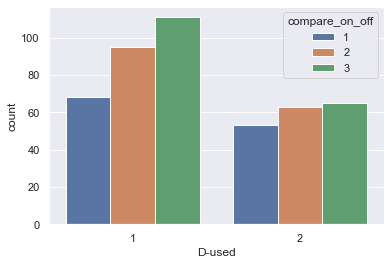

In [34]:
sns.countplot(x = 'D-used', data = df2, hue ='compare_on_off' );

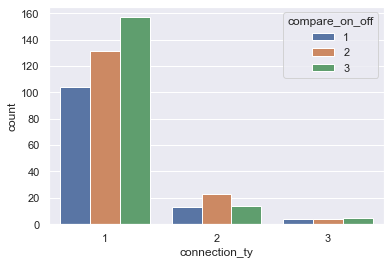

In [35]:
sns.countplot(x = 'connection_ty', data = df2, hue ='compare_on_off' );

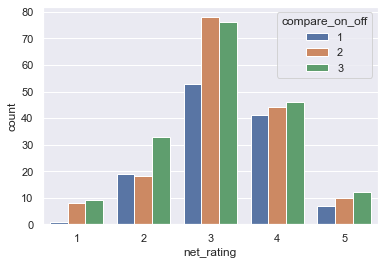

In [36]:
sns.countplot(x = 'net_rating', data = df2, hue ='compare_on_off' );

In [37]:
#sns.countplot(x = 'Cost of internet bill per month', data = df3, hue ='compare_on_off' );

In [38]:
#sns.countplot(x = 'hours_sp_p_d', data = df3, hue ='compare_on_off' );

In [39]:
#sns.countplot(x = 's_time_p_d', data = df3, hue ='compare_on_off' );

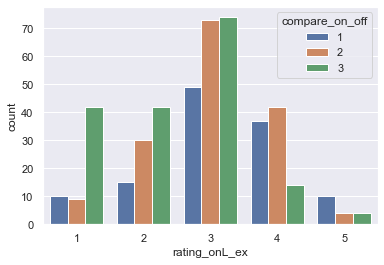

In [40]:
sns.countplot(x = 'rating_onL_ex', data = df3, hue ='compare_on_off' );

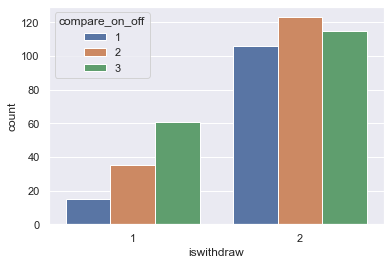

In [41]:
sns.countplot(x = 'iswithdraw', data = df3, hue ='compare_on_off' );

In [42]:
#sns.countplot(x = 's_reason_w', data = df3, hue ='compare_on_off' );

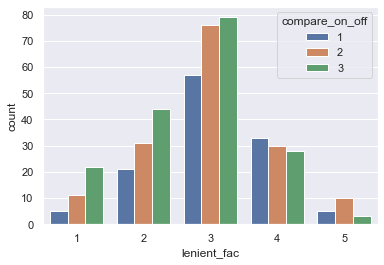

In [43]:
sns.countplot(x = 'lenient_fac', data = df3, hue ='compare_on_off' );

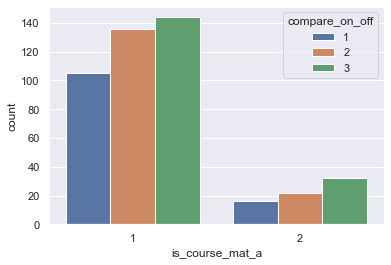

In [44]:
sns.countplot(x = 'is_course_mat_a', data = df3, hue ='compare_on_off' );

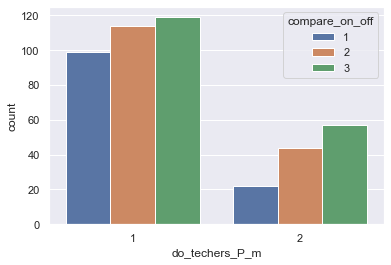

In [45]:
sns.countplot(x = 'do_techers_P_m', data = df3, hue ='compare_on_off' );

In [46]:
#sns.countplot(x = 'How_often_w_R', data = df3, hue ='compare_on_off' );

In [47]:
#let's investigate family income
df2['Family Income Per Month'].value_counts()

70000+         164
20000-29999     77
50000-59999     62
40000-49999     62
30000-39999     55
60000-69999     35
Name: Family Income Per Month, dtype: int64

In [48]:
#let's investigate family income
df2['s_reason_w'].value_counts()

No                                                                                                                                5
.                                                                                                                                 3
No reason                                                                                                                         2
N/a                                                                                                                               2
Not applicable                                                                                                                    2
                                                                                                                                 ..
Can't handle the pressure of online class                                                                                         1
Didn't get good faculty                                                     

In [49]:
     df2['Cost of internet bill per month'].value_counts()

1000     304
1500      98
2000      27
2000+     26
Name: Cost of internet bill per month, dtype: int64

In [50]:
#lets visualize with catagorical values
cat_featuresList = ['Age', 'Gender', 'Institute Type', 'Year',
       'Subject', 'D-used', 'connection_ty', 'net_rating','Cost of internet bill per month',
       'Is your electricity service uninterrupted? (1=Yes, 2=No)',
       
       'hours_sp_p_d', 's_time_p_d', 'rating_onL_ex',
       'iswithdraw', 's_reason_w', 'lenient_fac', 'is_course_mat_a',
       'do_techers_P_m', 'How_often_w_R']


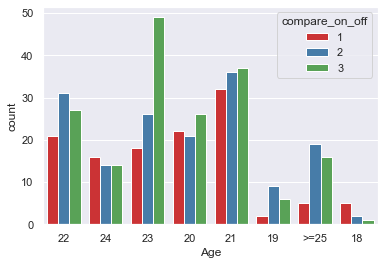

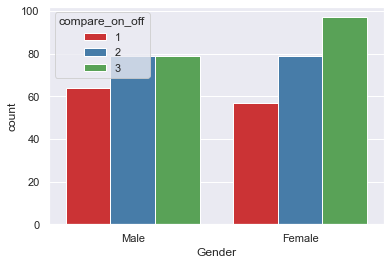

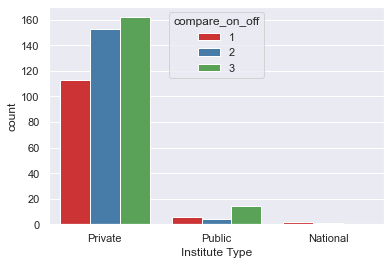

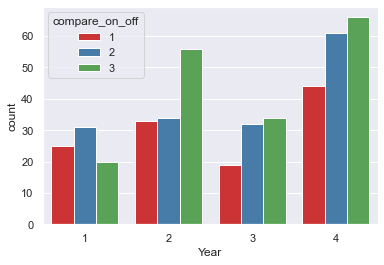

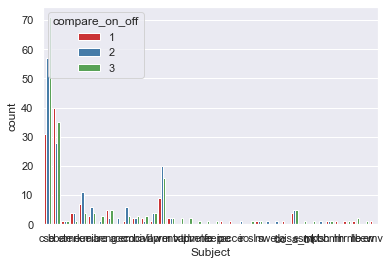

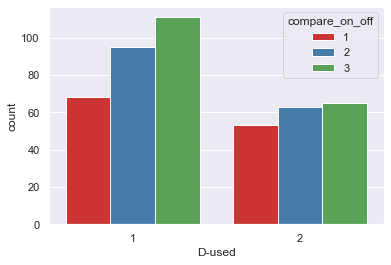

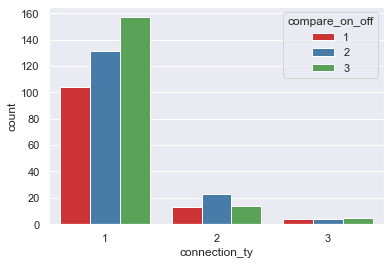

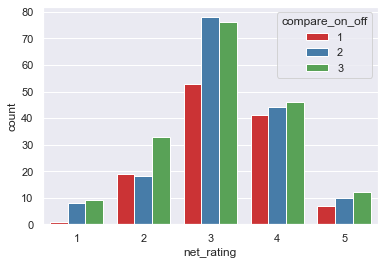

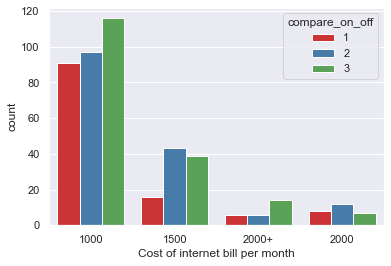

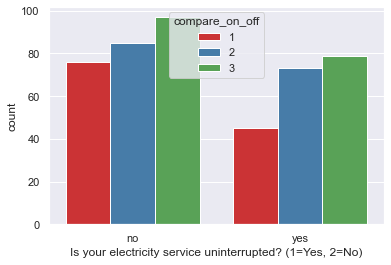

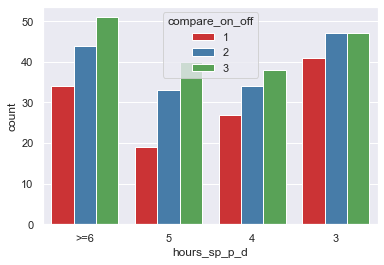

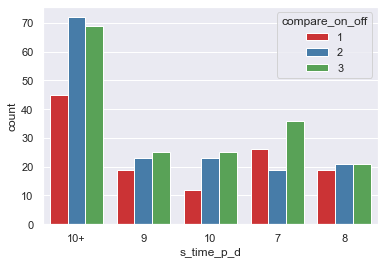

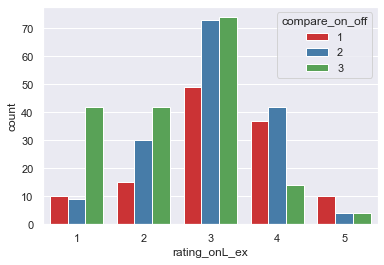

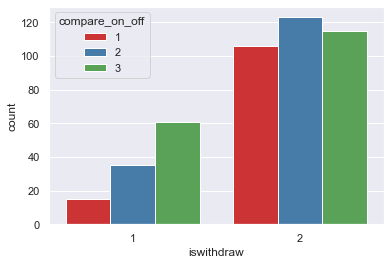

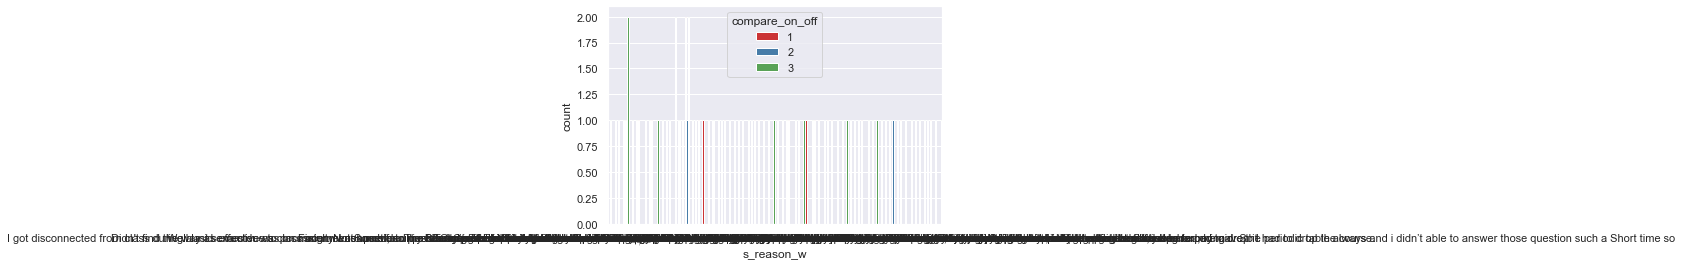

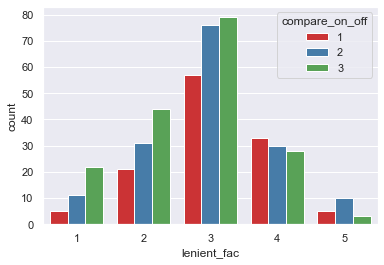

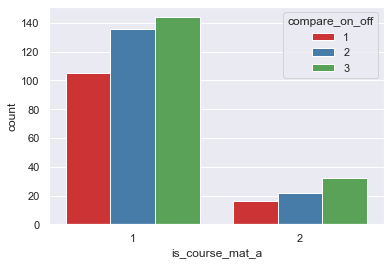

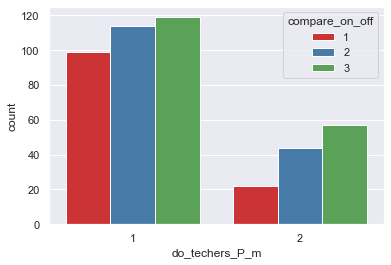

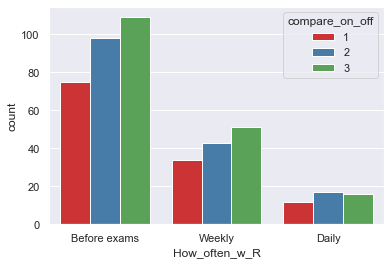

In [51]:
for f in cat_featuresList:
    plt.figure()
    sns.countplot(x = f, data = df2, hue = 'compare_on_off', palette = 'Set1')

In [52]:
cat_features2 = df2[cat_featuresList]
print(cat_features2.shape)

(455, 19)


In [53]:
# remove duplicate entries, if any
df2.drop_duplicates(inplace = True)
print(df2.shape)

(454, 21)


In [54]:
#visualize the dataset with sns pairplot
#caution: takes a lot of data - so we limit the data
#g = sns.pairplot(df1, hue = 'compare_on_off')

In [55]:
#lets investigate Institute type
df2['Institute Type'].unique()

array(['Private', 'Public', 'National'], dtype=object)

In [56]:
print(df2)
df2.drop(columns =['Timestamp','email'], inplace = True)
print(df2)

    Age  Gender Institute Type  Year  Subject  D-used  connection_ty  \
0    22    Male        Private     4      cse       1              1   
1    24    Male        Private     4      cse       1              1   
2    23    Male        Private     4      cse       1              1   
3    24  Female        Private     4      cse       2              1   
4    22  Female        Private     4      cse       1              2   
..   ..     ...            ...   ...      ...     ...            ...   
450  21  Female        Private     2  bc_a_bt       1              3   
451  20    Male        Private     2      bba       1              1   
452  20  Female        Private     1  bc_a_bt       1              1   
453  24    Male        Private     4      cse       1              1   
454  23    Male        Private     3      bba       1              1   

     net_rating Is your electricity service uninterrupted? (1=Yes, 2=No)  \
0             1                                            

KeyError: "['Timestamp' 'email'] not found in axis"

In [ ]:
cat_features = ['Institute Type','Year','connection_ty','net_rating','Cost of internet bill per month','Family Income Per Month','hours_sp_p_d','s_time_p_d','rating_onL_ex','compare_on_off','lenient_fac','How_often_w_R']

In [ ]:
list2 = ["Institute Type","Subject",]
print(list2)
df2['Subject'].unique()

In [ ]:
#df2['Subject'].replace({'CSE':'cse', 'Computer Science and Engineering':'cse', 'CSE ':'cse', 'BBA':'bba',
       'Computer Science And Engineering ':'cse', 'ETE':'ete', 'Marketing ':'mrk', 'EEE':'eee',
       'Microbiology ':'mib', 'BBA in Economics and International Business':'bba',
       'BBA finance':'bba', 'Computer Science':'cse', 'Marketing':'mrk', 'Cse':'cse', 'cse':'cse',
       'Architecture':'arc', 'B.A in English':'eng', 'biochemistry ':'mib',
       'BBA in Finance':'bba', 'Bba':'bba', 'Accounting ':'acc',
       'B.Sc in Computer Science and Engineering':'cse', 'Economics':'eco', 'MBA':'mba',
       'Bba in finance ':'bba', 'Civil&Environmental Engineering ':'civil', 'Law':'law',
       'CIVIL & ENVIRONMENTAL ENGINEERING ':'civil', 'LLB':'law', "B.Pharm(Hon's)":'prm',
       'Computer Science & Engineering':'cse', 'English':'eng', 'ece':'cse',
       'Environmental Science':'env', 'B.Sc in Textile Engineering ':'txtl',
       'computer science and egineering ':'cse', 'Computer Science Engineering':'cse',
       'Applied Mathematics':'apm', 'Pharmacy ':'prm', 'Bachelor of pharmacy':'prm',
       'Agricultural Engineering ':'arc', 'Doctor of veterinary medicine ':'dvete',
       'BBA in International Business':'bba', 'BBA ':'bba',
       'Computer Science and Engineering ':'cse', 'Cse445':'cse', '?':'cse',
       'Nutrition and Food Engineering':'nfe',
       'Chemical engineering and polymer science':'cep',
       'Industrial and Production Engineering':'ipe',
       'Applied Chemistry & Chemical Engineering':'acce',
       'International Relations  ':'ir',
       'Organization Strategy and Leadership':'osl', 'Mathematics':'m', 'Finance ':'bba',
       'SWE':'swe', 'Medicine':'m', 'Dental':'d', 'Manegment':'m', 'Business ':'bba',
       'Textile Engineering ':'txtl', 'Eee':'eee', 'AIS':'ais', 'Environmental science':'env',
       'english':'eng', 'Computer Science Engineering ':'cse', 'Bs in economics':'eco',
       'Biochemistry and biotechnology ':'bc_a_bt', 'Computer Science ':'cse', 'ESM':'esm',
       'LAW':'law', 'Biochemistry & Biotechnology':'bc_a_bt', 'Accounting':'bba',
       'Biochemistry ':'bc_a_bt', 'Biotechnology ':'bc_a_bt', 'ECE(CSE)':'cse',
       'English literature ':'eng', 'EEE Major, ECE':'cse', 'Bachelor of pharmacy ':'prm',
       'Mba':'mba', 'B.Pharm':'prm', 'CEE':'civil', 'Pharmaceutical Sciences':'prm', 'English ':'eng',
       'B.BA in Finance':'bba', 'MKT':'mkt', 'Pharmacy':'prm',
       'Computer Science & Engineering ':'cse', 'Finance and economics':'eco',
       'Biochemistry':'bc_a_bt', 'Public health ':'pbh', 'BBA GENERAL':'bba', 'BBA in Finance ':'bba',
       'Pharmaceutical Science':'prm', 'Supply chain management ':'scm',
       'Bachelors in Business Administration':'bba', 'Pharmaceutical sciences':'prm',
       'English linguistic.':'eng', '🙈':'bba', 'Bachelor in Pharmacy':'prm',
       'computer science and Engineering ':'cse', 'B.Pharm Professional ':'prm',
       'Pharmaceutical science ':'prm', 'Human Resource And Management ':'hr', 'eco':'eco',
       'Pharmaceutical Sciences ':'prm', 'Biochem and biotech':'bc_a_bt',
       'Professional pharmacy':'prm', 'Bachelor of bpharm professional':'prm',
       'Bachelors of Pharmacy':'prm', 'Major in CSE':'cse',
       'Department of pharmaceutical sciences':'prm',
       'Biochemistry and Biotechnology':'bc_a_bt',
       'Electrical and Electronic Engineering    ':'eee', 'BPharm':'prm',
       'BBA in Finance and HRM':'bba', 'bba':'bba', 'Pharmaceuticals science ':'prm',
       'International Business and Economics':'eco',
       'Biochemistry and biotechnology':'bc_a_bt', 'Finance':'bba', ' EEE':'eee', 'HRM':'hrm', 'LLB ':'llb',
       'Environmental Science and Management ':'env', 'B.pham ':'prm', 'BBA general':'bba',
       'Pharmacy Professional ':'prm',
       'Electronics and Telecommunication Engineering':'eee',
       'Civil and environment':'civil', 'BBA Marketing ':'bba', 'BBA in Economics':'bba',
       'Pharmacology ':'prm', 'Biochemistry and Biotechnology ':'bc_a_bt', 'Llb ':'llb',
       'Supply Chain Management ':'scm', 'Applied Mathematics ':'apm',
       'Pharmacy professionals ':'prm', 'BBA Department':'bba', 'Economic ':'eco', 'EEW':'eew',
       'Computer science and engineering ':'cse', 'CSe':'cse', 'ECONOMICS':'eco', 'L.L.B':'llb',
       'Microbiology':'mib', 'Biochemistry & Biotechnology ':'bc_a_bt', 'Management ':'emv',
       'Environmental science ':'env', 'BBA in FIN':'bba',
       'Environmental science and management':'env', 'SCM and FIN':'scm',
       'BBA in Marketing':'bba', 'ECE':'cse'},inplace=True)

In [ ]:
print(df2)

In [ ]:

df2['hours_sp_p_d'].value_counts()

In [ ]:
df2['Family Income Per Month'].value_counts()

In [ ]:
df2['Cost of internet bill per month'].value_counts()

In [ ]:

df2['s_time_p_d'].replace({'10+':10, '9':9, '7':7}, inplace = True)
df2['hours_sp_p_d'].replace({'>=6':6,'5':5,'4':4,'3':3}, inplace = True)
df2['Family Income Per Month'].replace({'70000+':7000,'20000-29999':25000,'40000-49999':45000,'50000-59999':55000,'30000-39999':35000,'60000-69999':65000},inplace = True)
df2['Cost of internet bill per month'].replace({'1000':1000 ,
'1500':1500 ,
'2000':2000 ,
'2000+':2000 }, inplace =True)
X = df2.drop(columns = 'compare_on_off') # X contains the features 
y= df2['compare_on_off']
print(X.shape)
print(X['Subject_pbh'])
X.head()


In [ ]:
#Holdout Validation approach-Train-Test split
from sklean.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

In [ ]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars